In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
ds = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set')

Found 4179 files belonging to 4 classes.


In [3]:
path = r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set'

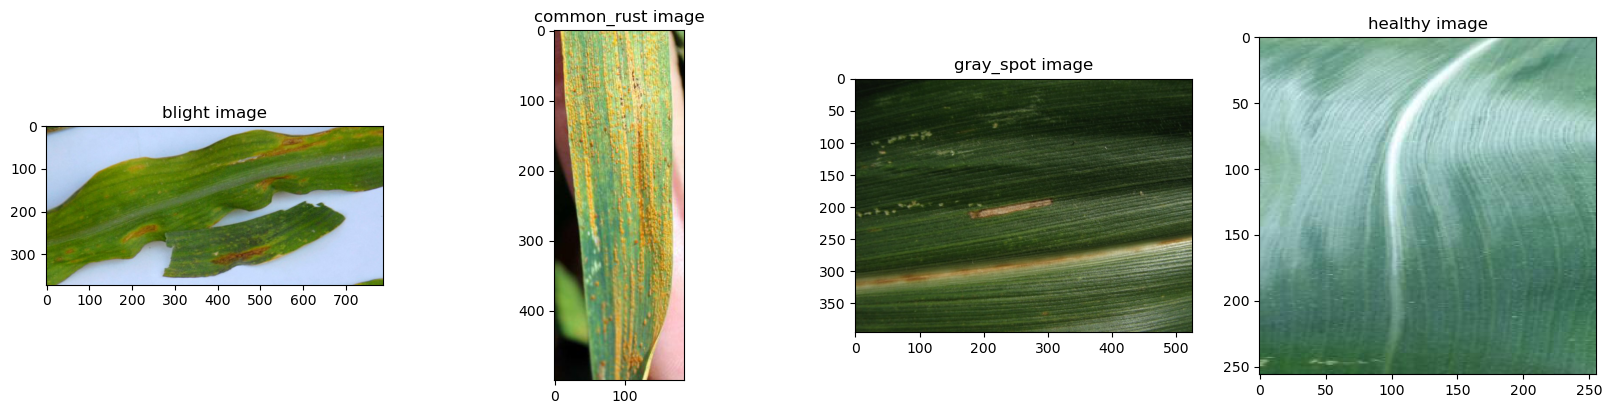

In [4]:
images = [
    r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set\Blight\Corn_Blight (1).jpg',
    r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set\Common_Rust\Corn_Common_Rust (1).jpg',
    r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set\Gray_Spot\Corn_Gray_Spot (1).jpg',
    r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\training_set\Healthy\Corn_Health (1).jpg',
]

diseases = ['blight' , 'common_rust', 'gray_spot', 'healthy' ]

diseases = [disease + ' image' for disease in diseases]
plt.figure(figsize=(20,10))
columns = 4
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns+1,columns,i+1)
    image = plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [5]:
batch_size=32
image_width=224
image_height=224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    validation_split = 0.5,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 4179 files belonging to 4 classes.
Using 2090 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=path,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(image_height, image_height),
    batch_size=batch_size
)

Found 4179 files belonging to 4 classes.
Using 1671 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Spot', 'Healthy']


In [9]:
for image_batch , label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x,y: (normalization_layer(x),y))
image_batch , label_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`
print(np.min(first_image),np.max(first_image))

0.028311392 0.8858942


In [12]:
num_classes = len(class_names) # Get the total number of classes in the dataset

# Define a Convolutional Neural Network (CNN) model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # Normalize pixel values to the range [0, 1]

    # First convolutional layer with 32 filters, kernal size of 3x3, and ReLU activation 
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(), # Applying max pooling to reduce spatial dimensions

    # Second convolutional layer with 64 filters
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Third convolutional layer with 128 filters
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Forth convolutional layer with 256 filters
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Flatten the feature maps into a 1D vector for fully connected layers
    tf.keras.layers.Flatten(),

    # Fully connected (Dense) layers
    tf.keras.layers.Dense(512, activation='relu'), # First dense layer with 512 neurons
    tf.keras.layers.Dense(64, activation='relu'), # Second dense layer with 64 neurons
    
    # Dropout layer to prevent overfitting (drops 15% of neurons)
    tf.keras.layers.Dropout(0.15),

    # Output layer with 'num_classes' neurons (one for each class) and softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [13]:
# Compile the model
model.compile(
    optimizer='adam', # Use Adam optimizer for efficient training
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function for multiple-class classification
    metrics=['accuracy'] # Track accuracy during Training and Evaluation
)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 996s 15s/step - accuracy: 0.4715 - loss: 1.3056 - val_accuracy: 0.7570 - val_loss: 0.7672
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 995s 14s/step - accuracy: 0.7366 - loss: 0.6661 - val_accuracy: 0.8348 - val_loss: 0.3909
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 956s 14s/step - accuracy: 0.8150 - loss: 0.4388 - val_accuracy: 0.8486 - val_loss: 0.3590
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1165s 18s/step - accuracy: 0.8367 - loss: 0.3772 - val_accuracy: 0.8534 - val_loss: 0.3773
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1506s 22s/step - accuracy: 0.8581 - loss: 0.3519 - val_accuracy: 0.8683 - val_loss: 0.3257
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 831s 12s/step - accuracy: 0.8653 - loss: 0.3202 - val_accuracy: 0.8659 - val_loss: 0.3425
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 487s 7s/step - accuracy: 0.8802 - loss: 0.2925 - val_accuracy: 0.8624 - val_loss: 0.3691
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 484s 7s/step - accuracy: 0.9073 - loss: 0.2410 - val_accuracy: 0.

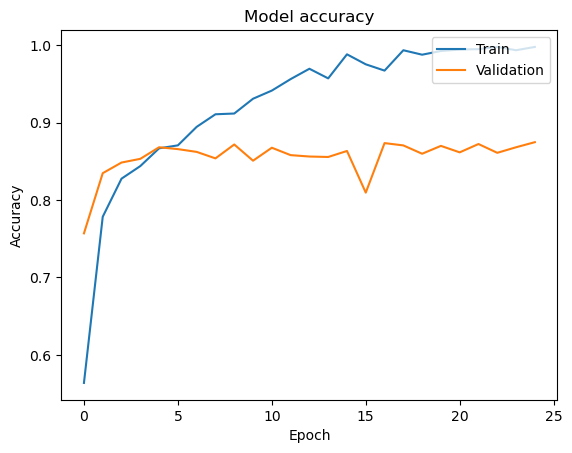

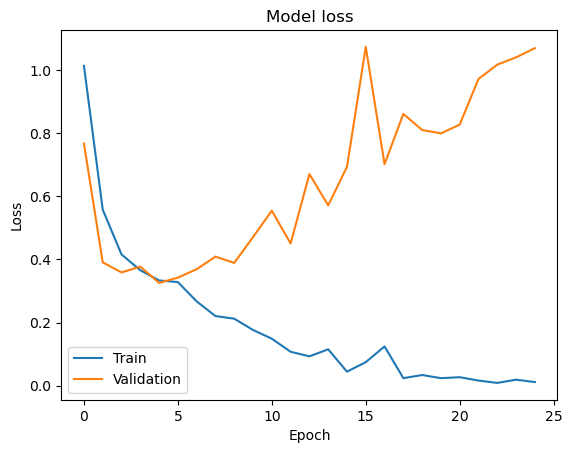

CPU times: total: 11h 33min 44s
Wall time: 4h 21min 6s


In [14]:
%%time
# Define an early stopping callback function to stop training if validation loss does not improve for 20 epoches
early_stopping = EarlyStopping(patience=20)

# Train the model
history = model.fit(train_ds,
          validation_data = val_ds,
          epochs=50,
          callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(val_ds)

# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,889,166 (220.83 MB)

 Trainable params: 19,296,388 (73.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,592,778 (147.22 MB)

In [16]:
loss , accu = model.evaluate(val_ds)
print(f"The testing accuracy is {accu*100:.2f}%")
print(f"The Testing loss is {loss:.4f}") # Keeping loss in its original scale

53/53 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8853 - loss: 0.9297
The testing accuracy is 87.49%
The Testing loss is 1.0695


In [17]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\testing_set',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    label_mode=None,
    shuffle=False)

Found 4179 files.


In [18]:
y_pred =  model.predict(test_ds, batch_size = batch_size, verbose = 1)
y_pred.shape

131/131 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step


(4179, 4)

In [19]:
y_pred_classes = y_pred.argmax(axis = 1)
y_pred_classes.shape

(4179,)

In [20]:
y_classes_names = [class_names[x] for x in y_pred_classes]

In [21]:
test_dir = r'C:\Users\KIM\Desktop\Project\Maize Disease Classification\training\testing_set'
image_filenames = sorted(os.listdir(test_dir))

# This must already be defined from model predictions
submission = pd.DataFrame({'filename': image_filenames, 'label': y_classes_names})

submission.to_csv('submission.csv', index = False)

In [22]:
# Define the directory to save models
save_dir = "../models"  # Adjust if needed
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# Get existing model versions
existing_versions = [
    int(f.split("_")[-1].split(".")[0])  # Extract version number
    for f in os.listdir(save_dir) if f.startswith("model_") and f.endswith(".keras")
]

# Determine new model version
new_version = max(existing_versions, default=0) + 1  # Start at model_1.keras

# Ensure `model` exists before trying to save
try:
    model
except NameError:
    raise RuntimeError("❌ No model found! Ensure your trained model is defined before saving.")

# Save the trained model with a version number
model_path = os.path.join(save_dir, f"model_{new_version}.keras")
model.save(model_path)

print(f"✅ Model saved successfully as {model_path}")


✅ Model saved successfully as ../models\model_1.keras


In [23]:
# Define the directory where models are saved
save_dir = "../models"  # Adjust if needed

# Get all saved model versions
model_files = [
    f for f in os.listdir(save_dir) if f.startswith("model_") and f.endswith(".keras")
]

if not model_files:
    raise RuntimeError("❌ No saved models found!")

# Find the latest model based on version number
latest_model_file = max(model_files, key=lambda f: int(f.split("_")[-1].split(".")[0]))

# Load the model
model_path = os.path.join(save_dir, latest_model_file)
model = keras.models.load_model(model_path)

print(f"✅ Loaded model: {latest_model_file}")


✅ Loaded model: model_1.keras
